# 第5课: Statistics

In [1]:
from scipy import stats

In [2]:
from scipy import optimize

In [3]:
import numpy as np
import random

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

## 1.Descriptive statistics

In [7]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [8]:
np.mean(x)

3.1000000000000001

In [9]:
np.median(x)

3.0

In [10]:
x.min(), x.max()

(0.90000000000000002, 6.7000000000000002)

In [11]:
x.var()

3.0700000000000007

In [12]:
x.std()

1.7521415467935233

In [13]:
x.var(ddof=1)

3.5085714285714293

In [14]:
x.std(ddof=1)

1.8731181032095732

## Random numbers

In [15]:
random.seed(123456789)

In [16]:
random.random()

0.6414006161858726

In [17]:
random.randint(0, 10)  # 0 and 10 inclusive

5

In [18]:
np.random.seed(123456789)

In [19]:
np.random.rand()

0.532833024789759

In [20]:
np.random.randn()

0.8768342101492541

In [21]:
np.random.rand(5)

array([ 0.71356403,  0.25699895,  0.75269361,  0.88387918,  0.15489908])

In [22]:
np.random.randn(2, 4)

array([[ 3.13325952,  1.15727052,  1.37591514,  0.94302846],
       [ 0.8478706 ,  0.52969142, -0.56940469,  0.83180456]])

In [23]:
np.random.randint(10, size=10)

array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])

In [24]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
       [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])

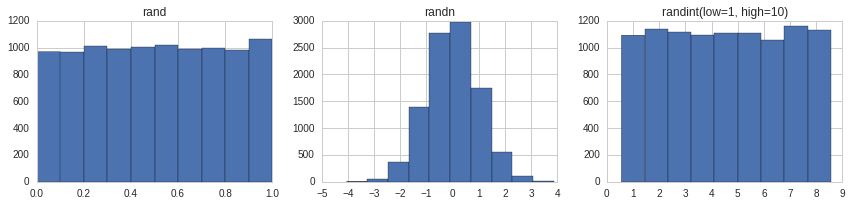

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()

In [26]:
#random.sample(range(10), 5)

In [27]:
np.random.choice(10, 5, replace=False)

array([9, 0, 5, 8, 1])

In [28]:
np.random.seed(123456789)

In [29]:
np.random.rand()

0.532833024789759

In [30]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [31]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [32]:
prng = np.random.RandomState(123456789)

In [33]:
prng.rand(2, 4)

array([[ 0.53283302,  0.5341366 ,  0.50955304,  0.71356403],
       [ 0.25699895,  0.75269361,  0.88387918,  0.15489908]])

In [34]:
prng.chisquare(1, size=(2, 2))

array([[  1.00418922e+00,   1.26859720e+00],
       [  2.02731988e+00,   2.52605129e-05]])

In [35]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [36]:
prng.f(5, 2, size=(2, 4))

array([[  0.77372119,   0.1213796 ,   1.64779052,   1.21399831],
       [  0.45471421,  17.64891848,   1.48620557,   2.55433261]])

In [37]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [38]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# 2.Probability distributions and random variables

In [39]:
np.random.seed(123456789)

In [40]:
X = stats.norm(1, 0.5)

In [41]:
X.mean()

1.0

In [42]:
X.median()

1.0

In [43]:
X.std()

0.5

In [44]:
X.var()

0.25

In [45]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [46]:
X.stats()

(array(1.0), array(0.25))

In [47]:
X.pdf([0, 1, 2])

array([ 0.10798193,  0.79788456,  0.10798193])

In [48]:
X.cdf([0, 1, 2])

array([ 0.02275013,  0.5       ,  0.97724987])

In [49]:
X.rvs(10)

array([ 2.106451  ,  2.0641989 ,  1.9208557 ,  1.04119124,  1.42948184,
        0.58699179,  1.57863526,  1.68795757,  1.47151423,  1.4239353 ])

In [50]:
stats.norm(1, 0.5).stats()

(array(1.0), array(0.25))

In [51]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.0), array(0.25))

In [52]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [53]:
X.interval(0.99)

(-0.28791465177445019, 2.2879146517744502)

In [54]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    
    for ax in axes:
        ax.legend()
    
    return axes

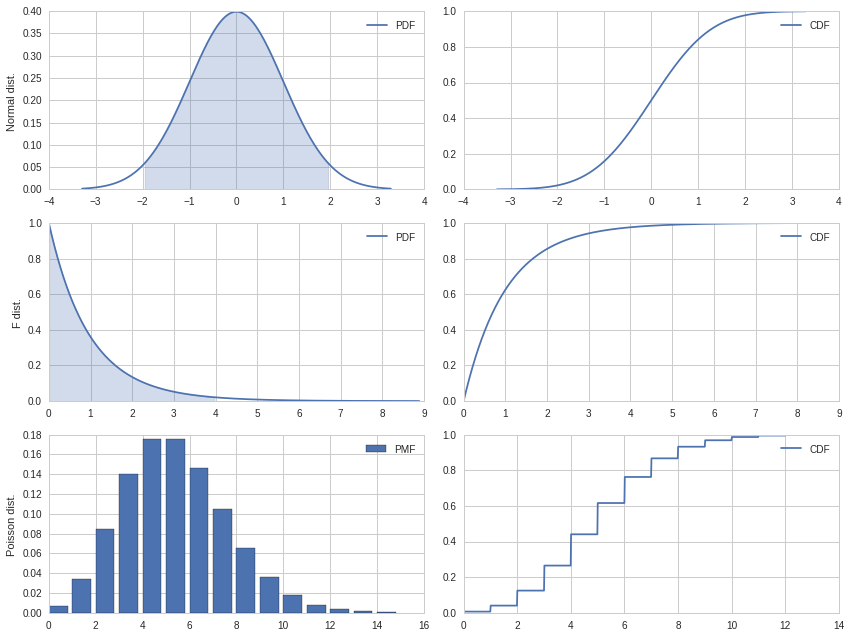

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()

# 3.Hypothesis testing

In [56]:
np.random.seed(123456789)

In [57]:
mu, sigma = 1.0, 0.5

In [58]:
X = stats.norm(mu-0.2, sigma)

In [59]:
n = 100

In [60]:
X_samples = X.rvs(n)

In [61]:
X_samples

array([ 1.906451  ,  1.8641989 ,  1.7208557 ,  0.84119124,  1.22948184,
        0.38699179,  1.37863526,  1.48795757,  1.27151423,  1.2239353 ,
        1.06484571,  0.51529766,  1.21590228,  0.9167982 ,  0.37616483,
       -0.03833091,  0.81666131,  0.99022234,  0.39855771,  0.38244049,
        0.26558278,  0.89496558,  0.77223149,  1.33122131,  1.08982338,
        0.63988908,  0.66512208,  0.96160696,  1.4871681 ,  0.69752843,
        0.93806611,  0.88127989,  0.58216328,  0.84821044, -0.14342554,
        1.09042324,  2.44362302,  0.90443931,  0.54014225,  1.81212831,
        0.95981261,  0.52885402,  0.56682503,  0.98474284,  0.63671076,
        1.36853954, -0.06568139,  0.17365665,  0.79048727,  1.2256104 ,
        0.58460666,  0.73467197,  0.31432151, -0.0594762 ,  0.44657977,
        0.48160983,  0.86150529,  1.14709589,  1.3279788 ,  0.99123044,
        0.95886167,  0.65348361,  1.22706869,  0.54348754,  0.36371881,
        0.88832119,  0.52034061,  0.55537639,  0.51895725,  0.40

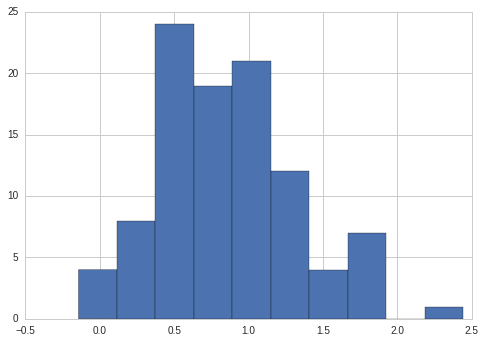

In [62]:
plt.hist(X_samples);

In [63]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))

In [64]:
z

-2.8338979550098298

In [65]:
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))

In [66]:
t

-2.9680338545657845

In [67]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [68]:
2 * stats.norm().cdf(-abs(z))

0.0045984013290753566

In [69]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0037586479674227209

In [70]:
t, p = stats.ttest_1samp(X_samples, mu)

In [71]:
t

-2.9680338545657841

In [72]:
p

0.0037586479674227209

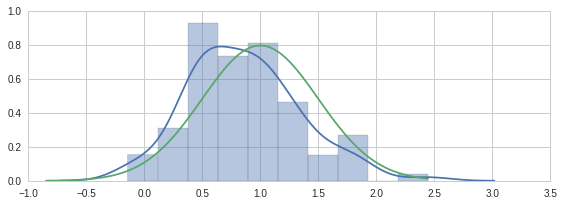

In [73]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()


In [74]:
n = 50

In [75]:
mu1, mu2 = np.random.rand(2)

In [76]:
X1 = stats.norm(mu1, sigma)

In [77]:
X1_sample = X1.rvs(n)

In [78]:
X2 = stats.norm(mu2, sigma)

In [79]:
X2_sample = X2.rvs(n)

In [80]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [81]:
t

-1.4283175246005888

In [82]:
p

0.15637981059673237

In [83]:
mu1, mu2

(0.24764580637159606, 0.42145435527527897)

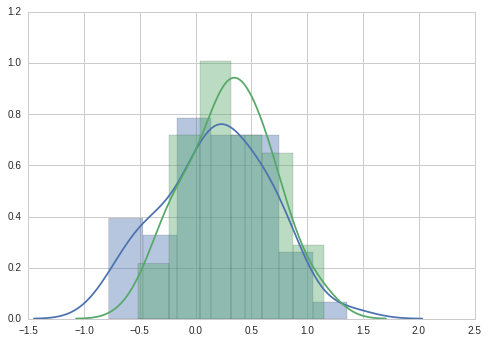

In [84]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

# 4.Nonparameteric methods

In [85]:
np.random.seed(0)

In [86]:
X = stats.chi2(df=5)

In [87]:
X_samples = X.rvs(100)

In [88]:
kde = stats.kde.gaussian_kde(X_samples)

In [89]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [90]:
x = np.linspace(0, 20, 100)

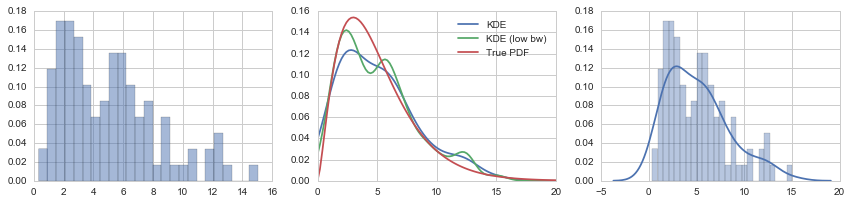

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()

In [92]:
kde.resample(10)

array([[ 1.75376869,  0.5812183 ,  8.19080268,  1.38539326,  7.56980335,
         1.16144715,  3.07747215,  5.69498716,  1.25685068,  9.55169736]])

In [93]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [94]:
kde_cdf = np.vectorize(_kde_cdf)

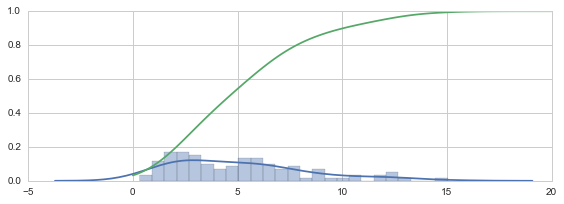

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()